<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Model-building/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from sklearn.metrics import silhouette_score

df = pd.read_excel("/content/New_Unknown.xlsx")
print("Total compounds:", len(df))
print(df.keys())

df = pd.read_excel("/content/New_Unknown.xlsx")
print(df.head())

feature_columns = ["Antioxidant", "Antiinflammatory", "Anti tumor", "OPP"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_columns])
n_clusters = 5
if np.any(np.isnan(df[feature_columns])) or np.any(np.isinf(df[feature_columns])):
    df = df.dropna(subset=feature_columns)

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
features = ["Antioxidant", "Antiinflammatory", "Anti tumor", "OPP"]
df['Cluster'] = kmeans.fit_predict(df[features])
print("Number of compounds in each cluster:")
print(df.head())
print(df['Cluster'].value_counts())
cluster_counts = df['Cluster'].value_counts()
cluster_means = df.groupby('Cluster')[['Antioxidant', 'Antiinflammatory', 'Anti tumor', 'OPP']].mean()
print("Mean Values for Each Cluster:")
print(cluster_means)

Total compounds: 288
Index(['Compounds', 'Antioxidant', 'Antiinflammatory', 'Anti tumor', 'OPP'], dtype='object')
    Compounds  Antioxidant  Antiinflammatory  Anti tumor  OPP
0    Gossypin            1                 1           1    0
1   Quercetin            1                 1           0    1
2    Farnesol            1                 1           0    1
3    Limonene            1                 0           0    1
4  Curcumenol            1                 1           1    1
Number of compounds in each cluster:
    Compounds  Antioxidant  Antiinflammatory  Anti tumor  OPP  Cluster
0    Gossypin            1                 1           1    0        4
1   Quercetin            1                 1           0    1        2
2    Farnesol            1                 1           0    1        2
3    Limonene            1                 0           0    1        3
4  Curcumenol            1                 1           1    1        1
Cluster
0    71
2    67
3    62
1    55
4    33
Nam

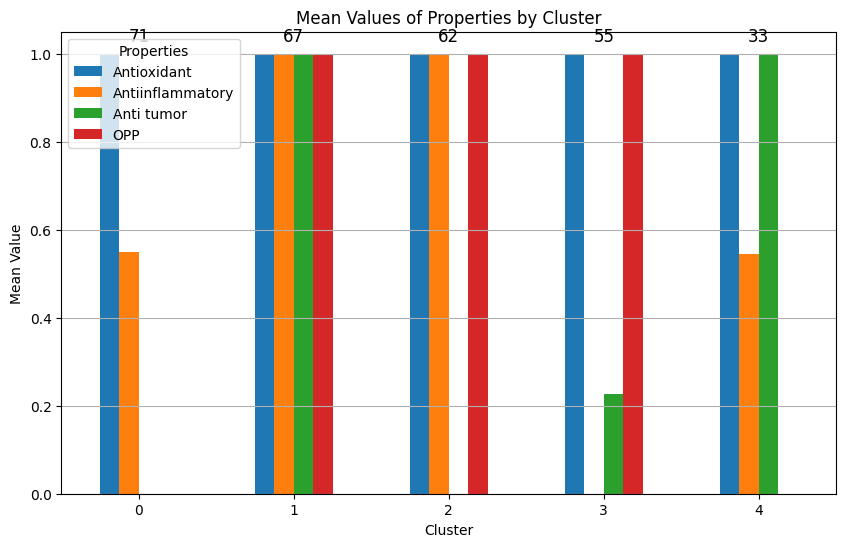

In [45]:
import matplotlib.pyplot as plt
ax = cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Properties by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Properties')
for i, count in enumerate(cluster_counts):
   if i < len(ax.patches):
    bar_height = ax.patches[i].get_height()  # Get height of the i-th bar
    ax.text(i, bar_height + 0.02, str(count), ha='center', va='bottom', fontsize=12)
plt.show()


In [46]:
print(df.columns)

Index(['Compounds', 'Antioxidant', 'Antiinflammatory', 'Anti tumor', 'OPP',
       'Cluster'],
      dtype='object')


In [47]:
print(f'Silhouette Score: {silhouette_avg}')
silhouette_df = pd.DataFrame({'Silhouette Score': [silhouette_avg]})
silhouette_df.to_excel('Clustering_Silhouette_Score.xlsx', index=False)

Silhouette Score: 0.7524309576913154


In [48]:
# Calculate a composite ranking score for each cluster
cluster_means['Ranking Score'] = cluster_means.sum(axis=1)
# Rank clusters based on the composite score in descending order
cluster_ranking = cluster_means[['Ranking Score']].sort_values(by='Ranking Score', ascending=False)
cluster_ranking['Rank'] = range(1, len(cluster_ranking) + 1)
# Save the ranking to an Excel file
cluster_ranking.to_excel('Cluster_Ranking.xlsx', index_label='Cluster')
# Display the ranking
print("Cluster Ranking based on composite score:")
print(cluster_ranking)


Cluster Ranking based on composite score:
         Ranking Score  Rank
Cluster                     
1             4.000000     1
2             3.000000     2
4             2.545455     3
3             2.225806     4
0             1.549296     5
